   #### Mawrer Amed Ramirez Martinez ms723737@iteso.mx
   #### Avance de TOG IDI 4

#  Ajuste de Dataset (Preparacion para Clasificacion)
# El objetivo de este Notebook es SOLO agregar YHat


In [10]:
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import pandas as pd
import os, glob

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
SOURCE_TYPE = "EURUSD_FULL"
FRECUENCIA = "1D"
NUM_FEATURES = 0

In [13]:
pwd = os.getcwd()
datasource_path = os.path.join(pwd, r'../../../Datasets/Junio2020/procesados-regression/')
filenames = glob.glob(datasource_path + "/*.csv")
filenames.sort()
for file in filenames:
    print(os.path.basename(file))

R-EURUSD_FULL_1D_44F.csv
R-EURUSD_FULL_1H_44F.csv
R-EURUSD_FULL_1H_49F.csv


## Read CSV

### Read Dataset From Regression

In [5]:
if FRECUENCIA =="1D":
    dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
else:
    dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
DATASET_FULL = pd.read_csv(filenames[1], header=0, parse_dates=['Gmt time'], date_parser=dateparse)
print(DATASET_FULL)
print(DATASET_FULL.shape)

       Gmt time     Open     High      Low    Close        Volume  Open_Bid  \
0    2004-01-01  1.25950  1.26052  1.24698  1.25733  4.621817e+05   1.25934   
1    2004-01-02  1.25717  1.26282  1.25214  1.25832  1.066578e+06   1.25701   
2    2004-01-04  1.25925  1.26487  1.25789  1.26318  6.879980e+04   1.25855   
3    2004-01-05  1.26324  1.26935  1.26301  1.26830  1.119689e+06   1.26308   
4    2004-01-06  1.26836  1.28093  1.26666  1.27150  1.125442e+06   1.26820   
...         ...      ...      ...      ...      ...           ...       ...   
5132 2020-05-26  1.09019  1.09960  1.08970  1.09787  2.219154e+05   1.09015   
5133 2020-05-27  1.09788  1.10311  1.09342  1.10169  3.392159e+05   1.09785   
5134 2020-05-28  1.10168  1.10937  1.09919  1.10782  2.907155e+05   1.10165   
5135 2020-05-29  1.10780  1.11452  1.10702  1.11071  3.306924e+05   1.10778   
5136 2020-05-31  1.11213  1.11217  1.11028  1.11158  1.012642e+04   1.11129   

      High_Bid  Low_Bid  Close_Bid    Volume_Bid   

In [32]:
#DEFINE VALUES
NEG_UNO = -0.0015
UNO = 0.0015


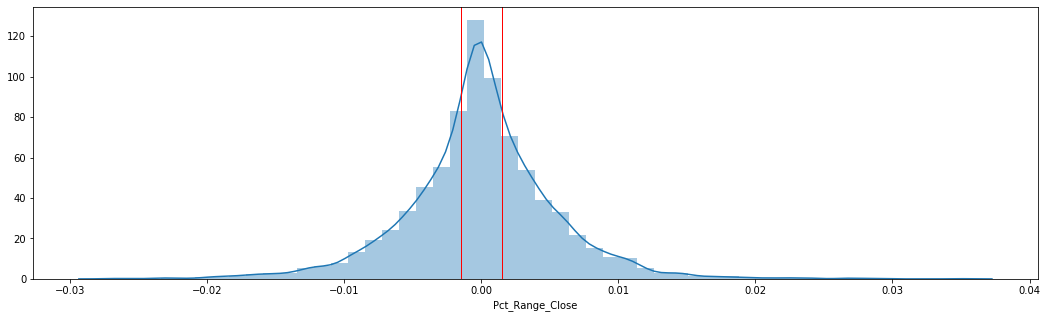

In [33]:
plt.figure(figsize=(18,5))
sns.distplot(DATASET_FULL['Pct_Range_Close']);
plt.axvline(UNO, 0, 1, linewidth=1, color='r')
plt.axvline(NEG_UNO, 0, 1, linewidth=1, color='r')

### Add Col 'YHat' 

In [34]:
DATASET_FULL['Class'] = 0

DATASET_FULL.loc[DATASET_FULL['Pct_Range_Close'] <= NEG_UNO, 'Class'] = -1
DATASET_FULL.loc[DATASET_FULL['Pct_Range_Close'] >= UNO, 'Class'] = 1

DATASET_FULL['Class'] = DATASET_FULL['Class'].shift(-1)
DATASET_FULL['Class'].fillna(0, inplace=True)
print(DATASET_FULL['Class'].head(5))

0    0.0
1    1.0
2    1.0
3    1.0
4   -1.0
Name: Class, dtype: float64


In [35]:
print(DATASET_FULL['Class'].value_counts())

 1.0    1729
 0.0    1716
-1.0    1692
Name: Class, dtype: int64


In [36]:
DATASET_FULL['Class'].describe()

count    5137.000000
mean        0.007203
std         0.816107
min        -1.000000
25%        -1.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Class, dtype: float64

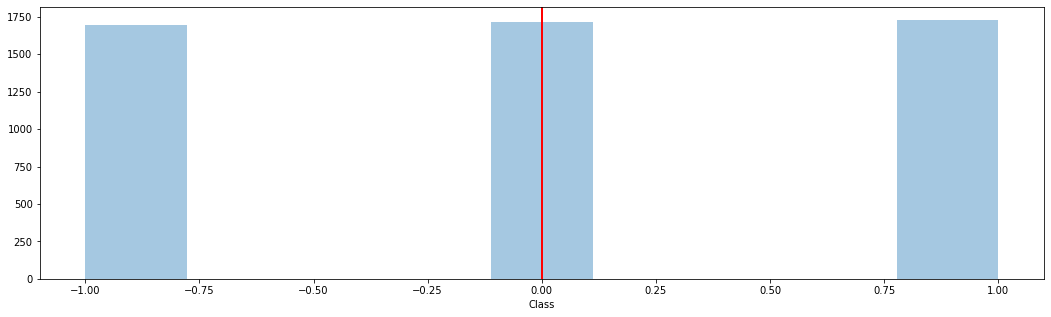

In [37]:
plt.figure(figsize=(18,5))
sns.distplot(DATASET_FULL['Class'],kde=False);
plt.axvline(UNO, 0, 1, linewidth=1, color='r')
plt.axvline(NEG_UNO, 0, 1, linewidth=1, color='r')

In [38]:
DATASET_FULL[['Close','Pct_Range_Close','Class']].head(10)

,Close,Pct_Range_Close,Class
0,1.25733,0.000000,0.0
1,1.25832,0.000787,1.0
2,1.26318,0.003862,1.0
3,1.26830,0.004053,1.0
4,1.27150,0.002523,-1.0
5,1.26377,-0.006079,1.0
6,1.27696,0.010437,1.0
7,1.28149,0.003547,1.0
8,1.28477,0.002560,-1.0
9,1.27390,-0.008461,1.0


### Save CSV File 'DF_EURUSD_ASK_1H_PROC.csv'

In [39]:
#Get the Final number of Features
NUM_FEATURES = str(DATASET_FULL.shape[1])
filename = '3C-' + SOURCE_TYPE + '_' + FRECUENCIA + '_' + NUM_FEATURES + 'F.csv'
print(filename)

3C-EURUSD_FULL_1D_21F.csv


In [40]:
pwd = os.getcwd()
filename_path = os.path.join(pwd, r'../../../Datasets/Junio2020/procesados_classification/' + filename)
DATASET_FULL.to_csv(filename_path, header=True, index=False)